In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [28]:
df = pd.read_csv('data/ossl_all_L0_v1.2.csv')

C:\Users\KORISNIK\AppData\Local\Temp\ipykernel_7732\2291480009.py:1: DtypeWarning: Columns (1,4,5,6,15,16,17,21,25,62,111,112,113,114,115,116,117,118,119,120,121,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/ossl_all_L0_v1.2.csv')


In [3]:
df.head()

,dataset.code_ascii_txt,id.layer_local_c,id.layer_uuid_txt,id.project_ascii_txt,id.location_olc_txt,id.dataset.site_ascii_txt,id.scan_local_c,longitude.point_wgs84_dd,latitude.point_wgs84_dd,layer.sequence_usda_uint16,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
0,AFSIS1.SSL,icr072246,ded584d70bf0474202d30e575ae24784,Africa Soil Information Service (AfSIS-1),6F4QJMCP+VX,NaN,icr072246,15.687492,-7.377750,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFSIS1.SSL,icr072247,7c080e182bc23e19747629f46edbc6c4,Africa Soil Information Service (AfSIS-1),6F4QJMCP+VX,NaN,icr072247,15.687492,-7.377750,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFSIS1.SSL,icr072266,03bbd570dfd399bfd866ebcdf860de39,Africa Soil Information Service (AfSIS-1),6F4QJMXQ+G4,NaN,icr072266,15.687817,-7.351243,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFSIS1.SSL,icr072267,887d316328ef950eeca33293bfe052bf,Africa Soil Information Service (AfSIS-1),6F4QJMXQ+G4,NaN,icr072267,15.687817,-7.351243,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFSIS1.SSL,icr072286,ca03ce6e439b1909c5a4a771c0afa951,Africa Soil Information Service (AfSIS-1),6F4QMM9Q+85,NaN,icr072286,15.687965,-7.331673,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(135651, 2910)

In [21]:
columns_to_describe = []

columns_to_describe.append('clay.tot_usda.a334_w.pct')
columns_to_describe.append('clay.tot_iso.11277_w.pct')

columns_to_describe.append('sand.tot_usda.c60_w.pct')
columns_to_describe.append('sand.tot_iso.11277_w.pct')

columns_to_describe.append('silt.tot_usda.c62_w.pct')
columns_to_describe.append('silt.tot_iso.11277_w.pct')

columns_to_describe.append('oc_usda.c729_w.pct')
columns_to_describe.append('oc_iso.10694_w.pct')

columns_to_describe.append('c.tot_usda.a622_w.pct')

columns_to_describe.append('caco3_usda.a54_w.pct')
columns_to_describe.append('caco3_iso.10693_w.pct')

columns_to_describe.append('ph.h2o_usda.a268_index')
columns_to_describe.append('ph.h2o_iso.10390_index')

columns_to_describe.append('bd_usda.a4_g.cm3')

columns_to_describe.append('ec_usda.a364_ds.m')
columns_to_describe.append('ec_iso.11265_ds.m')

columns_to_describe.append('cec_usda.a723_cmolc.kg')
columns_to_describe.append('cec_iso.11260_cmolc.kg')

columns_to_describe.append('wr.1500kPa_usda.a417_w.pct')

columns_to_describe.append('n.tot_usda.a623_w.pct')
columns_to_describe.append('n.tot_iso.11261_w.pct')

columns_to_describe.append('ca.ext_usda.a722_cmolc.kg')

columns_to_describe.append('k.ext_usda.a725_cmolc.kg')

columns_to_describe.append('fe.dith_usda.a66_w.pct')

columns_to_describe.append('mg.ext_usda.a724_cmolc.kg')

In [22]:
df_to_describe = df[columns_to_describe]
df_to_describe.describe()

,clay.tot_usda.a334_w.pct,clay.tot_iso.11277_w.pct,sand.tot_usda.c60_w.pct,sand.tot_iso.11277_w.pct,silt.tot_usda.c62_w.pct,silt.tot_iso.11277_w.pct,oc_usda.c729_w.pct,oc_iso.10694_w.pct,c.tot_usda.a622_w.pct,caco3_usda.a54_w.pct,...,ec_iso.11265_ds.m,cec_usda.a723_cmolc.kg,cec_iso.11260_cmolc.kg,wr.1500kPa_usda.a417_w.pct,n.tot_usda.a623_w.pct,n.tot_iso.11261_w.pct,ca.ext_usda.a722_cmolc.kg,k.ext_usda.a725_cmolc.kg,fe.dith_usda.a66_w.pct,mg.ext_usda.a724_cmolc.kg
count,56433.000000,23489.000000,54996.000000,23489.000000,55049.000000,23489.000000,55900.000000,41023.000000,90229.000000,34850.000000,...,22032.000000,57064.000000,18982.000000,41345.000000,90244.000000,40764.000000,57087.000000,97851.000000,31138.000000,57095.000000
mean,24.336707,18.008770,38.448675,40.029205,37.278069,37.299076,4.221173,4.618916,6.506045,7.323270,...,0.284473,20.953984,15.780050,14.830248,0.334662,0.301924,21.602500,0.791919,1.243592,5.239798
std,17.612159,12.923853,28.914025,26.057981,20.621358,18.967898,9.877097,8.363640,12.767289,12.845233,...,0.397419,23.157906,14.461804,16.169149,0.620324,0.371014,32.457331,1.101334,1.595065,8.165315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.003100,0.000000,1.000000,0.020040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.448180,7.000000,12.200000,18.000000,20.700000,24.000000,0.330000,1.250000,0.560360,0.213875,...,0.103900,7.782617,7.000000,6.908800,0.052640,0.120000,2.999980,0.215835,0.330140,0.875470
50%,21.849210,16.000000,33.100000,38.000000,37.100000,38.000000,0.980000,2.050000,1.502450,1.036585,...,0.174050,15.332835,12.400000,11.587490,0.116015,0.190000,11.352270,0.483401,0.818625,2.720480
75%,34.047250,26.000000,60.900000,61.000000,53.000000,51.000000,2.610000,3.900000,3.929750,9.418098,...,0.290000,24.643728,20.300000,17.142860,0.271245,0.310000,27.118130,0.982147,1.562160,6.403570
max,100.000000,79.000000,100.000000,100.000000,256.000000,92.000000,65.600000,58.680000,78.452140,101.371080,...,9.690000,584.586550,234.000000,244.230770,41.901010,3.860000,410.406180,51.311576,28.436960,172.639610


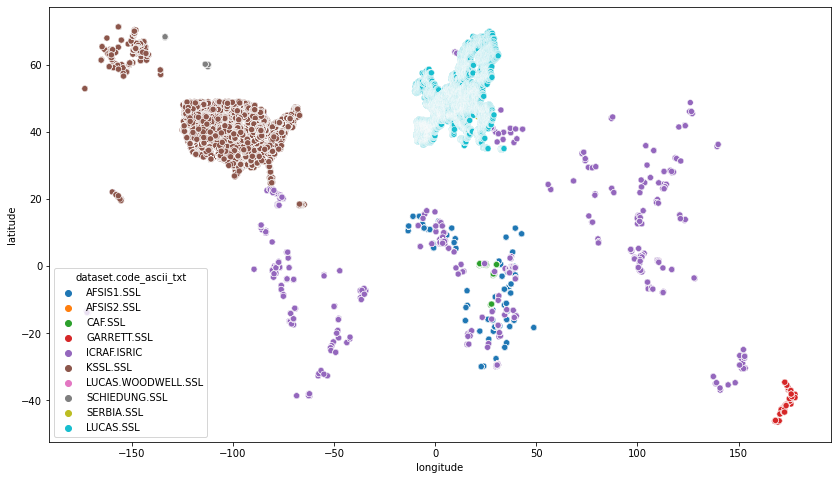

In [6]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='longitude.point_wgs84_dd', y='latitude.point_wgs84_dd', hue='dataset.code_ascii_txt')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [15]:
datasets = df['dataset.code_ascii_txt',].value_counts()
datasets

KSSL.SSL              86603
LUCAS.SSL             40175
ICRAF.ISRIC            4073
AFSIS1.SSL             1904
CAF.SSL                1578
LUCAS.WOODWELL.SSL      589
SCHIEDUNG.SSL           259
GARRETT.SSL             184
AFSIS2.SSL              151
SERBIA.SSL              135
Name: dataset.code_ascii_txt, dtype: int64

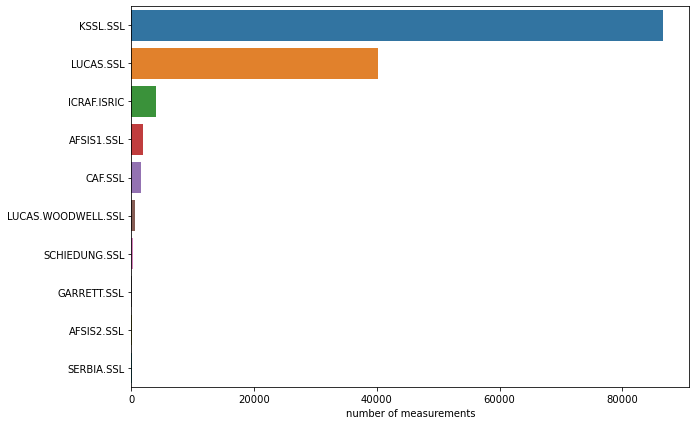

In [33]:
plt.figure(figsize=(10,7))
plt.xlabel('number of measurements')
sns.barplot(x=datasets.values, y=datasets.keys())
plt.show()

In [35]:
mir_columns = []
visnir_columns = []

mir_wavelengths = []
visnir_wavelengths = []

for column in df.columns:
    if 'scan_mir' in column:
        mir_columns.append(column)
        mir_wavelengths.append(column[9:len(column)-4])
    elif 'scan_visnir' in column:
        visnir_columns.append(column)
        visnir_wavelengths.append(column[12:len(column)-4])

### KSSL

In [38]:
columns = []
columns.append('dataset.code_ascii_txt')
for column in mir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data.shape

(76813, 1702)

In [39]:
columns = []
columns.append('dataset.code_ascii_txt')
for column in visnir_columns:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'KSSL.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data.shape

(19807, 1077)

### LUCAS

In [40]:
columns = []
columns.append('dataset.code_ascii_txt')
for column in visnir_columns[25:]:
    columns.append(column)

data = df[df['dataset.code_ascii_txt'] == 'LUCAS.SSL']
data = data[columns]
data = data.dropna(axis='rows')
data.shape

(40175, 1052)

In [7]:
for column in df.columns:
    print(column)

dataset.code_ascii_txt
id.layer_local_c
id.layer_uuid_txt
id.project_ascii_txt
id.location_olc_txt
id.dataset.site_ascii_txt
id.scan_local_c
longitude.point_wgs84_dd
latitude.point_wgs84_dd
layer.sequence_usda_uint16
layer.upper.depth_usda_cm
layer.lower.depth_usda_cm
observation.date.begin_iso.8601_yyyy.mm.dd
observation.date.end_iso.8601_yyyy.mm.dd
surveyor.title_utf8_txt
layer.texture_usda_txt
pedon.taxa_usda_txt
horizon.designation_usda_txt
longitude.county_wgs84_dd
latitude.county_wgs84_dd
location.point.error_any_m
location.country_iso.3166_txt
observation.ogc.schema.title_ogc_txt
observation.ogc.schema_idn_url
surveyor.contact_ietf_email
surveyor.address_utf8_txt
dataset.title_utf8_txt
dataset.owner_utf8_txt
dataset.address_idn_url
dataset.doi_idf_url
dataset.license.title_ascii_txt
dataset.license.address_idn_url
dataset.contact.name_utf8_txt
dataset.contact_ietf_email
acidity_usda.a795_cmolc.kg
aggstb_usda.a1_w.pct
al.dith_usda.a65_w.pct
al.ext_aquaregia_g.kg
al.ext_usda.a1056

In [9]:
df_mir = df[mir_columns]
print(df_mir.shape)
df_mir.head()

(135651, 1701)


,scan_mir.600_abs,scan_mir.602_abs,scan_mir.604_abs,scan_mir.606_abs,scan_mir.608_abs,scan_mir.610_abs,scan_mir.612_abs,scan_mir.614_abs,scan_mir.616_abs,scan_mir.618_abs,...,scan_mir.3982_abs,scan_mir.3984_abs,scan_mir.3986_abs,scan_mir.3988_abs,scan_mir.3990_abs,scan_mir.3992_abs,scan_mir.3994_abs,scan_mir.3996_abs,scan_mir.3998_abs,scan_mir.4000_abs
0,1.527853,1.531908,1.532084,1.530892,1.530645,1.531506,1.531582,1.531413,1.532904,1.535459,...,0.356776,0.356642,0.355784,0.354743,0.354104,0.353663,0.353237,0.352923,0.352548,0.352053
1,1.538449,1.543622,1.545751,1.546997,1.549450,1.553714,1.557981,1.561652,1.566082,1.571555,...,0.358399,0.358142,0.357144,0.355980,0.355242,0.354722,0.354217,0.353825,0.353376,0.352798
2,1.619721,1.614226,1.615612,1.620649,1.626406,1.631747,1.636411,1.639527,1.642449,1.646890,...,0.372522,0.372338,0.371425,0.370337,0.369679,0.369245,0.368808,0.368469,0.368084,0.367563
3,1.570129,1.567954,1.573055,1.580834,1.586880,1.590397,1.595117,1.600492,1.603847,1.606447,...,0.357992,0.357734,0.356713,0.355480,0.354681,0.354137,0.353619,0.353217,0.352756,0.352158
4,1.484832,1.484367,1.484977,1.486258,1.488400,1.492040,1.495075,1.496595,1.498354,1.501437,...,0.316249,0.316089,0.315098,0.313910,0.313210,0.312758,0.312312,0.311971,0.311568,0.311044


In [10]:
df_visnir = df[visnir_columns]
print(df_visnir.shape)
df_visnir.head()

(135651, 1076)


,scan_visnir.350_ref,scan_visnir.352_ref,scan_visnir.354_ref,scan_visnir.356_ref,scan_visnir.358_ref,scan_visnir.360_ref,scan_visnir.362_ref,scan_visnir.364_ref,scan_visnir.366_ref,scan_visnir.368_ref,...,scan_visnir.2482_ref,scan_visnir.2484_ref,scan_visnir.2486_ref,scan_visnir.2488_ref,scan_visnir.2490_ref,scan_visnir.2492_ref,scan_visnir.2494_ref,scan_visnir.2496_ref,scan_visnir.2498_ref,scan_visnir.2500_ref
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for column in mir_columns:
    nan_count = df_mir[column].isna().sum()
    print(column, ':', nan_count)

scan_mir.600_abs : 49967
scan_mir.602_abs : 49967
scan_mir.604_abs : 49967
scan_mir.606_abs : 49967
scan_mir.608_abs : 49967
scan_mir.610_abs : 49967
scan_mir.612_abs : 49967
scan_mir.614_abs : 49967
scan_mir.616_abs : 49967
scan_mir.618_abs : 49967
scan_mir.620_abs : 49967
scan_mir.622_abs : 49967
scan_mir.624_abs : 49967
scan_mir.626_abs : 49967
scan_mir.628_abs : 49967
scan_mir.630_abs : 49967
scan_mir.632_abs : 49967
scan_mir.634_abs : 49967
scan_mir.636_abs : 49967
scan_mir.638_abs : 49967
scan_mir.640_abs : 49967
scan_mir.642_abs : 49967
scan_mir.644_abs : 49967
scan_mir.646_abs : 49967
scan_mir.648_abs : 49967
scan_mir.650_abs : 49967
scan_mir.652_abs : 49967
scan_mir.654_abs : 49967
scan_mir.656_abs : 49967
scan_mir.658_abs : 49967
scan_mir.660_abs : 49967
scan_mir.662_abs : 49967
scan_mir.664_abs : 49967
scan_mir.666_abs : 49967
scan_mir.668_abs : 49967
scan_mir.670_abs : 49967
scan_mir.672_abs : 49967
scan_mir.674_abs : 49967
scan_mir.676_abs : 49967
scan_mir.678_abs : 49967


scan_mir.1500_abs : 49967
scan_mir.1502_abs : 49967
scan_mir.1504_abs : 49967
scan_mir.1506_abs : 49967
scan_mir.1508_abs : 49967
scan_mir.1510_abs : 49967
scan_mir.1512_abs : 49967
scan_mir.1514_abs : 49967
scan_mir.1516_abs : 49967
scan_mir.1518_abs : 49967
scan_mir.1520_abs : 49967
scan_mir.1522_abs : 49967
scan_mir.1524_abs : 49967
scan_mir.1526_abs : 49967
scan_mir.1528_abs : 49967
scan_mir.1530_abs : 49967
scan_mir.1532_abs : 49967
scan_mir.1534_abs : 49967
scan_mir.1536_abs : 49967
scan_mir.1538_abs : 49967
scan_mir.1540_abs : 49967
scan_mir.1542_abs : 49967
scan_mir.1544_abs : 49967
scan_mir.1546_abs : 49967
scan_mir.1548_abs : 49967
scan_mir.1550_abs : 49967
scan_mir.1552_abs : 49967
scan_mir.1554_abs : 49967
scan_mir.1556_abs : 49967
scan_mir.1558_abs : 49967
scan_mir.1560_abs : 49967
scan_mir.1562_abs : 49967
scan_mir.1564_abs : 49967
scan_mir.1566_abs : 49967
scan_mir.1568_abs : 49967
scan_mir.1570_abs : 49967
scan_mir.1572_abs : 49967
scan_mir.1574_abs : 49967
scan_mir.157

scan_mir.2646_abs : 49967
scan_mir.2648_abs : 49967
scan_mir.2650_abs : 49967
scan_mir.2652_abs : 49967
scan_mir.2654_abs : 49967
scan_mir.2656_abs : 49967
scan_mir.2658_abs : 49967
scan_mir.2660_abs : 49967
scan_mir.2662_abs : 49967
scan_mir.2664_abs : 49967
scan_mir.2666_abs : 49967
scan_mir.2668_abs : 49967
scan_mir.2670_abs : 49967
scan_mir.2672_abs : 49967
scan_mir.2674_abs : 49967
scan_mir.2676_abs : 49967
scan_mir.2678_abs : 49967
scan_mir.2680_abs : 49967
scan_mir.2682_abs : 49967
scan_mir.2684_abs : 49967
scan_mir.2686_abs : 49967
scan_mir.2688_abs : 49967
scan_mir.2690_abs : 49967
scan_mir.2692_abs : 49967
scan_mir.2694_abs : 49967
scan_mir.2696_abs : 49967
scan_mir.2698_abs : 49967
scan_mir.2700_abs : 49967
scan_mir.2702_abs : 49967
scan_mir.2704_abs : 49967
scan_mir.2706_abs : 49967
scan_mir.2708_abs : 49967
scan_mir.2710_abs : 49967
scan_mir.2712_abs : 49967
scan_mir.2714_abs : 49967
scan_mir.2716_abs : 49967
scan_mir.2718_abs : 49967
scan_mir.2720_abs : 49967
scan_mir.272

scan_mir.3726_abs : 49967
scan_mir.3728_abs : 49967
scan_mir.3730_abs : 49967
scan_mir.3732_abs : 49967
scan_mir.3734_abs : 49967
scan_mir.3736_abs : 49967
scan_mir.3738_abs : 49967
scan_mir.3740_abs : 49967
scan_mir.3742_abs : 49967
scan_mir.3744_abs : 49967
scan_mir.3746_abs : 49967
scan_mir.3748_abs : 49967
scan_mir.3750_abs : 49967
scan_mir.3752_abs : 49967
scan_mir.3754_abs : 49967
scan_mir.3756_abs : 49967
scan_mir.3758_abs : 49967
scan_mir.3760_abs : 49967
scan_mir.3762_abs : 49967
scan_mir.3764_abs : 49967
scan_mir.3766_abs : 49967
scan_mir.3768_abs : 49967
scan_mir.3770_abs : 49967
scan_mir.3772_abs : 49967
scan_mir.3774_abs : 49967
scan_mir.3776_abs : 49967
scan_mir.3778_abs : 49967
scan_mir.3780_abs : 49967
scan_mir.3782_abs : 49967
scan_mir.3784_abs : 49967
scan_mir.3786_abs : 49967
scan_mir.3788_abs : 49967
scan_mir.3790_abs : 49967
scan_mir.3792_abs : 49967
scan_mir.3794_abs : 49967
scan_mir.3796_abs : 49967
scan_mir.3798_abs : 49967
scan_mir.3800_abs : 49967
scan_mir.380

In [12]:
for column in visnir_columns:
    nan_count = df_visnir[column].isna().sum()
    print(column, ':', nan_count)

scan_visnir.350_ref : 111771
scan_visnir.352_ref : 111771
scan_visnir.354_ref : 111771
scan_visnir.356_ref : 111771
scan_visnir.358_ref : 111771
scan_visnir.360_ref : 111771
scan_visnir.362_ref : 111771
scan_visnir.364_ref : 111771
scan_visnir.366_ref : 111771
scan_visnir.368_ref : 111771
scan_visnir.370_ref : 111771
scan_visnir.372_ref : 111771
scan_visnir.374_ref : 111771
scan_visnir.376_ref : 111771
scan_visnir.378_ref : 111771
scan_visnir.380_ref : 111771
scan_visnir.382_ref : 111771
scan_visnir.384_ref : 111771
scan_visnir.386_ref : 111771
scan_visnir.388_ref : 111771
scan_visnir.390_ref : 111771
scan_visnir.392_ref : 111771
scan_visnir.394_ref : 111771
scan_visnir.396_ref : 111771
scan_visnir.398_ref : 111771
scan_visnir.400_ref : 71007
scan_visnir.402_ref : 71007
scan_visnir.404_ref : 71007
scan_visnir.406_ref : 71007
scan_visnir.408_ref : 71007
scan_visnir.410_ref : 71007
scan_visnir.412_ref : 71007
scan_visnir.414_ref : 71007
scan_visnir.416_ref : 71007
scan_visnir.418_ref : 7

scan_visnir.1012_ref : 71007
scan_visnir.1014_ref : 71007
scan_visnir.1016_ref : 71007
scan_visnir.1018_ref : 71007
scan_visnir.1020_ref : 71007
scan_visnir.1022_ref : 71007
scan_visnir.1024_ref : 71007
scan_visnir.1026_ref : 71007
scan_visnir.1028_ref : 71007
scan_visnir.1030_ref : 71007
scan_visnir.1032_ref : 71007
scan_visnir.1034_ref : 71007
scan_visnir.1036_ref : 71007
scan_visnir.1038_ref : 71007
scan_visnir.1040_ref : 71007
scan_visnir.1042_ref : 71007
scan_visnir.1044_ref : 71007
scan_visnir.1046_ref : 71007
scan_visnir.1048_ref : 71007
scan_visnir.1050_ref : 71007
scan_visnir.1052_ref : 71007
scan_visnir.1054_ref : 71007
scan_visnir.1056_ref : 71007
scan_visnir.1058_ref : 71007
scan_visnir.1060_ref : 71007
scan_visnir.1062_ref : 71007
scan_visnir.1064_ref : 71007
scan_visnir.1066_ref : 71007
scan_visnir.1068_ref : 71007
scan_visnir.1070_ref : 71007
scan_visnir.1072_ref : 71007
scan_visnir.1074_ref : 71007
scan_visnir.1076_ref : 71007
scan_visnir.1078_ref : 71007
scan_visnir.10

scan_visnir.1852_ref : 71007
scan_visnir.1854_ref : 71007
scan_visnir.1856_ref : 71007
scan_visnir.1858_ref : 71007
scan_visnir.1860_ref : 71007
scan_visnir.1862_ref : 71007
scan_visnir.1864_ref : 71007
scan_visnir.1866_ref : 71007
scan_visnir.1868_ref : 71007
scan_visnir.1870_ref : 71007
scan_visnir.1872_ref : 71007
scan_visnir.1874_ref : 71007
scan_visnir.1876_ref : 71007
scan_visnir.1878_ref : 71007
scan_visnir.1880_ref : 71007
scan_visnir.1882_ref : 71007
scan_visnir.1884_ref : 71007
scan_visnir.1886_ref : 71007
scan_visnir.1888_ref : 71007
scan_visnir.1890_ref : 71007
scan_visnir.1892_ref : 71007
scan_visnir.1894_ref : 71007
scan_visnir.1896_ref : 71007
scan_visnir.1898_ref : 71007
scan_visnir.1900_ref : 71007
scan_visnir.1902_ref : 71007
scan_visnir.1904_ref : 71007
scan_visnir.1906_ref : 71007
scan_visnir.1908_ref : 71007
scan_visnir.1910_ref : 71007
scan_visnir.1912_ref : 71007
scan_visnir.1914_ref : 71007
scan_visnir.1916_ref : 71007
scan_visnir.1918_ref : 71007
scan_visnir.19

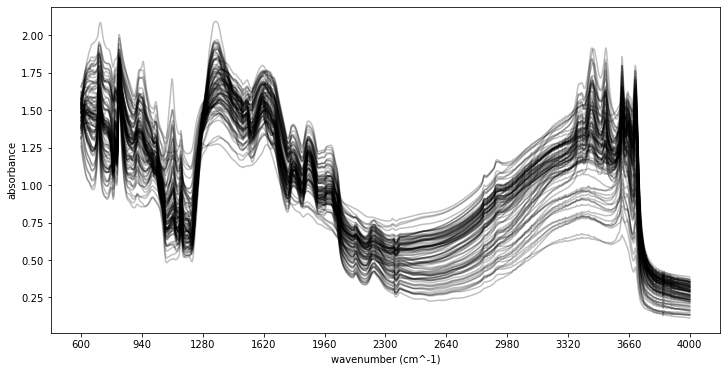

In [13]:
plt.figure(figsize=[12,6])
for index in range(100):
    plt.plot(list(df_mir.loc[index]), c='k', alpha=0.25)
plt.xticks(range(0, 1701, 170), range(600, 4001, 340))
plt.xlabel('wavenumber (cm^-1)')
plt.ylabel('absorbance')
plt.show()

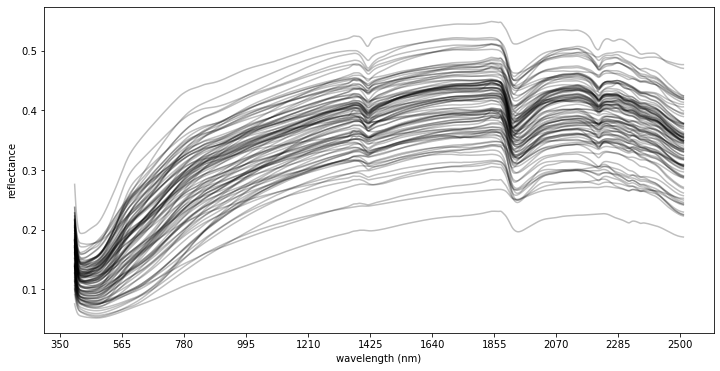

In [14]:
plt.figure(figsize=[12,6])
for index in range(100000, 100100):
    plt.plot(list(df_visnir.loc[index]), c='k', alpha=0.25)
plt.xticks(range(0, 1076, 107), range(350, 2501, 215))
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.show()

# CLAY

In [9]:
df['clay.tot_usda.a334_w.pct'].isna().sum()

79218

In [10]:
df2 = df['clay.tot_usda.a334_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                  0
0             AFSIS1.SSL                  8
3            GARRETT.SSL                 42
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                333
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1067
5               KSSL.SSL              36594
6              LUCAS.SSL              40175


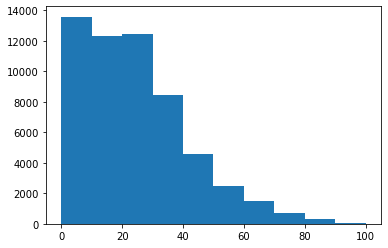

In [11]:
plt.hist(df['clay.tot_usda.a334_w.pct'])
plt.show()

C:\Users\KORISNIK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


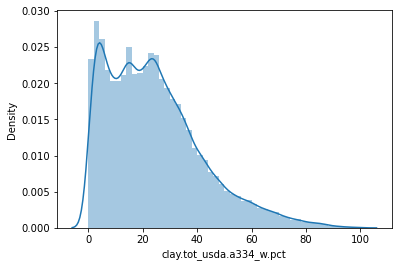

In [4]:
sns.distplot(df['clay.tot_usda.a334_w.pct'])
plt.show()

<AxesSubplot:xlabel='clay.tot_usda.a334_w.pct', ylabel='Count'>

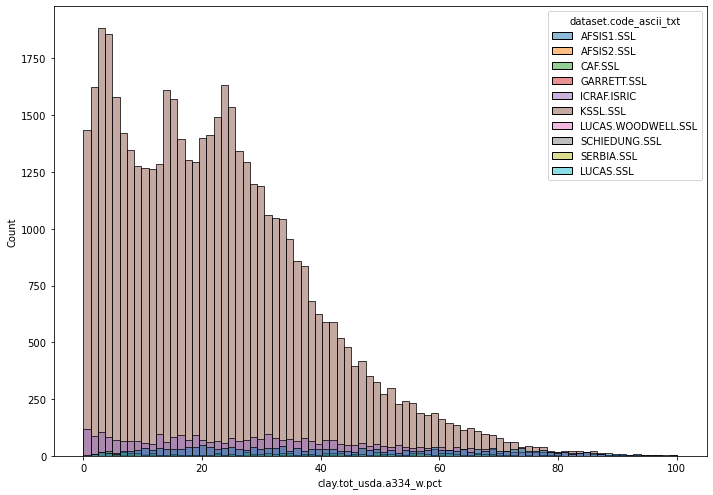

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='clay.tot_usda.a334_w.pct', hue='dataset.code_ascii_txt')

In [3]:
df2 = df['clay.tot_iso.11277_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
7     LUCAS.WOODWELL.SSL                  0
8          SCHIEDUNG.SSL                  9
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              17525
5               KSSL.SSL              86603


<AxesSubplot:xlabel='clay.tot_iso.11277_w.pct', ylabel='Count'>

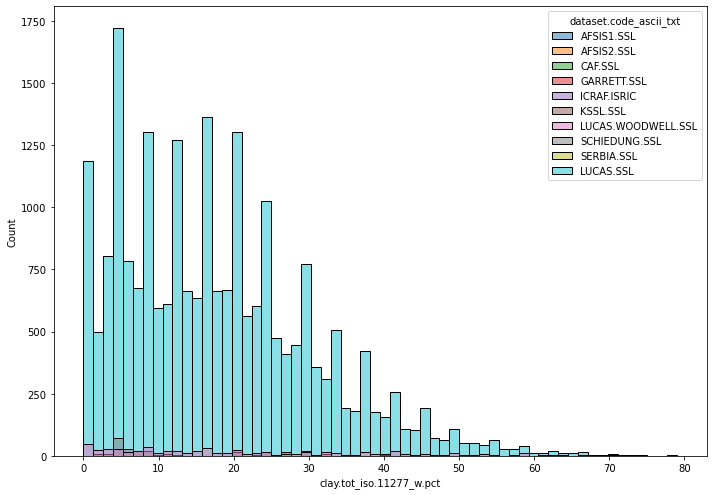

In [16]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='clay.tot_iso.11277_w.pct', hue='dataset.code_ascii_txt')

# SAND

In [14]:
df['sand.tot_usda.c60_w.pct'].isna().sum()

80655

In [15]:
df2 = df['sand.tot_usda.c60_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                  0
0             AFSIS1.SSL                 13
3            GARRETT.SSL                 42
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                392
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1114
5               KSSL.SSL              37920
6              LUCAS.SSL              40175


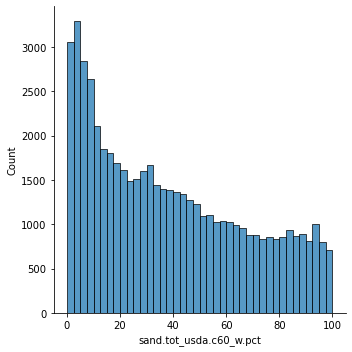

In [27]:
sns.displot(df['sand.tot_usda.c60_w.pct'])

<AxesSubplot:xlabel='sand.tot_usda.c60_w.pct', ylabel='Count'>

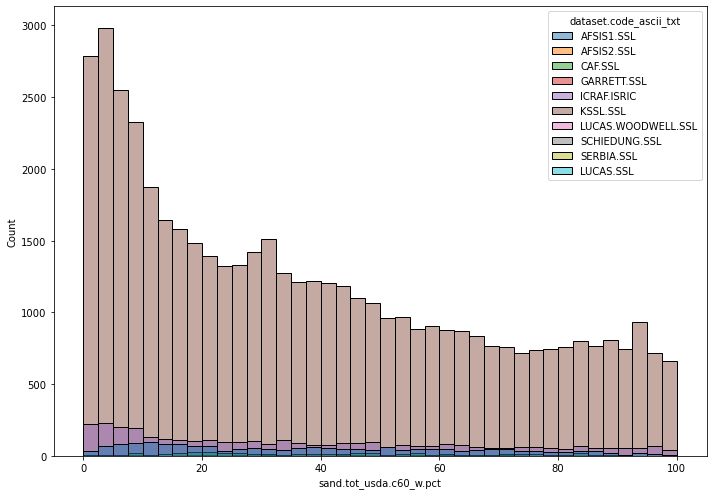

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='sand.tot_usda.c60_w.pct', hue='dataset.code_ascii_txt')

In [5]:
df2 = df['sand.tot_iso.11277_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
7     LUCAS.WOODWELL.SSL                  0
8          SCHIEDUNG.SSL                  9
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              17525
5               KSSL.SSL              86603


<AxesSubplot:xlabel='sand.tot_iso.11277_w.pct', ylabel='Count'>

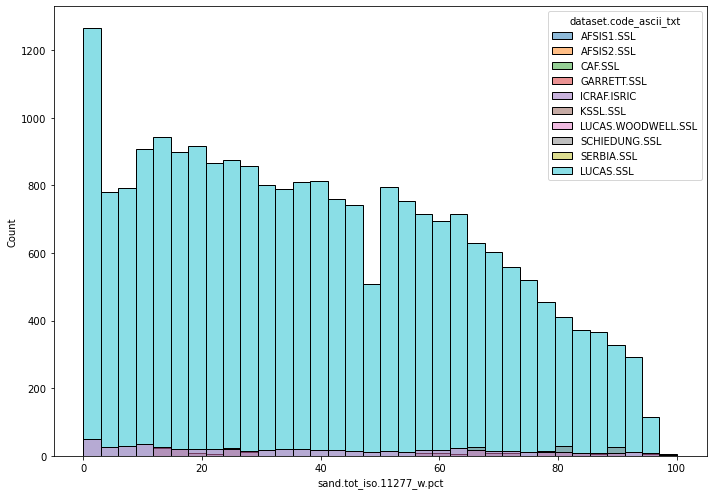

In [19]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='sand.tot_iso.11277_w.pct', hue='dataset.code_ascii_txt')

# SILT

In [18]:
df['silt.tot_usda.c62_w.pct'].isna().sum()

80602

In [19]:
df2 = df['silt.tot_usda.c62_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                  0
0             AFSIS1.SSL                 14
3            GARRETT.SSL                 42
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                339
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1114
5               KSSL.SSL              37919
6              LUCAS.SSL              40175


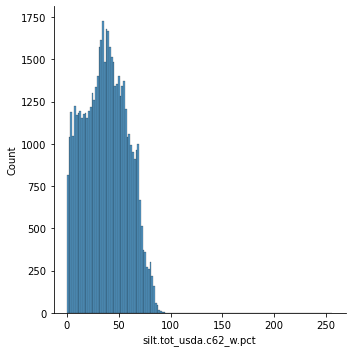

In [30]:
sns.displot(df['silt.tot_usda.c62_w.pct'],)

<AxesSubplot:xlabel='silt.tot_usda.c62_w.pct', ylabel='Count'>

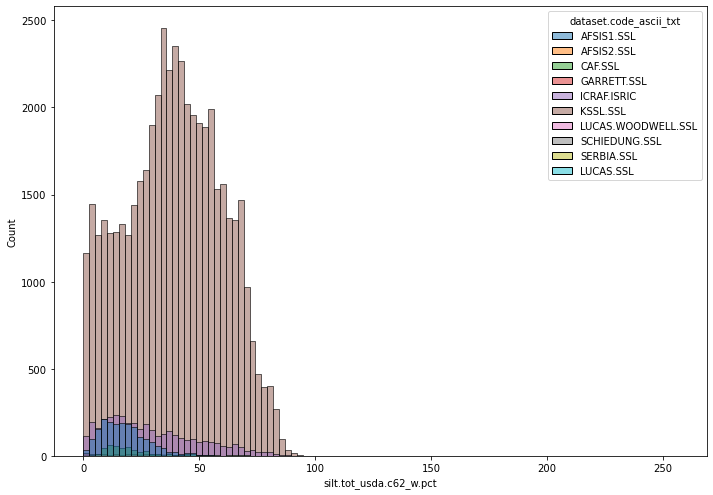

In [41]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='silt.tot_usda.c62_w.pct', hue='dataset.code_ascii_txt', bins=100)

In [33]:
df2 = df['silt.tot_iso.11277_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
7     LUCAS.WOODWELL.SSL                  0
8          SCHIEDUNG.SSL                  9
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              17525
5               KSSL.SSL              86603


<AxesSubplot:xlabel='silt.tot_iso.11277_w.pct', ylabel='Count'>

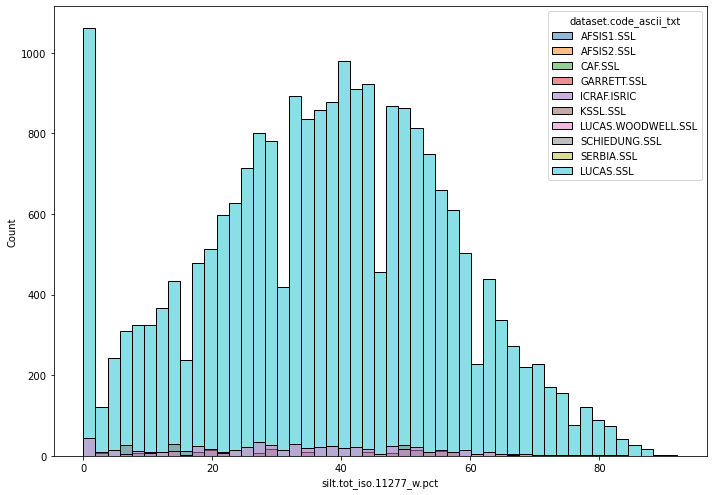

In [22]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='silt.tot_iso.11277_w.pct', hue='dataset.code_ascii_txt')

# CALCIUM CARBONATE

In [22]:
df['caco3_usda.a54_w.pct'].isna().sum()

100801

In [23]:
df2 = df['caco3_usda.a54_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                 90
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               2956
6              LUCAS.SSL              40175
5               KSSL.SSL              52915


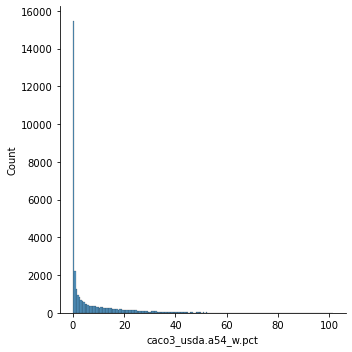

In [33]:
sns.displot(df['caco3_usda.a54_w.pct'])

<AxesSubplot:xlabel='caco3_usda.a54_w.pct', ylabel='Count'>

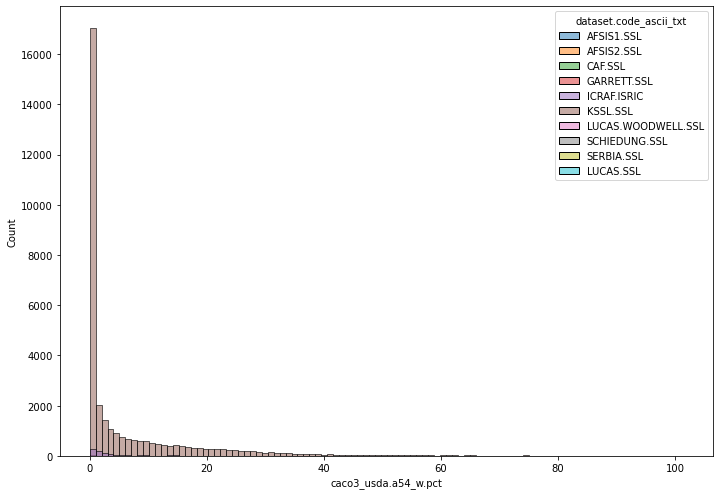

In [40]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='caco3_usda.a54_w.pct', hue='dataset.code_ascii_txt', bins=100)

In [32]:
df2 = df['caco3_iso.10693_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
6              LUCAS.SSL                  0
7     LUCAS.WOODWELL.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
5               KSSL.SSL              86603


<AxesSubplot:xlabel='caco3_iso.10693_w.pct', ylabel='Count'>

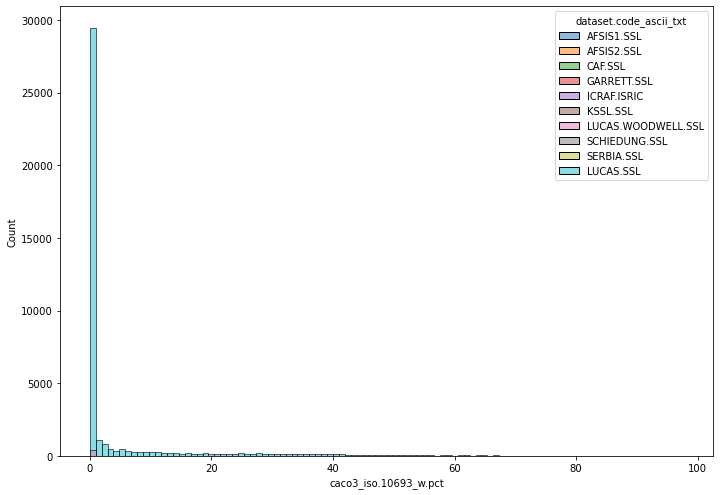

In [39]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='caco3_iso.10693_w.pct', hue='dataset.code_ascii_txt', bins=100)

# ORGANIC CARBON

In [34]:
df['oc_usda.c729_w.pct'].isna().sum()

79751

In [35]:
df2 = df['oc_usda.c729_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                 90
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
5               KSSL.SSL              30748
6              LUCAS.SSL              40175


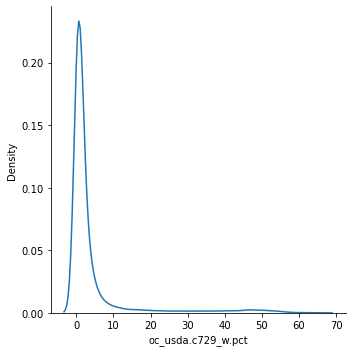

In [36]:
sns.displot(df['oc_usda.c729_w.pct'], kind="kde")

<AxesSubplot:xlabel='oc_usda.c729_w.pct', ylabel='Count'>

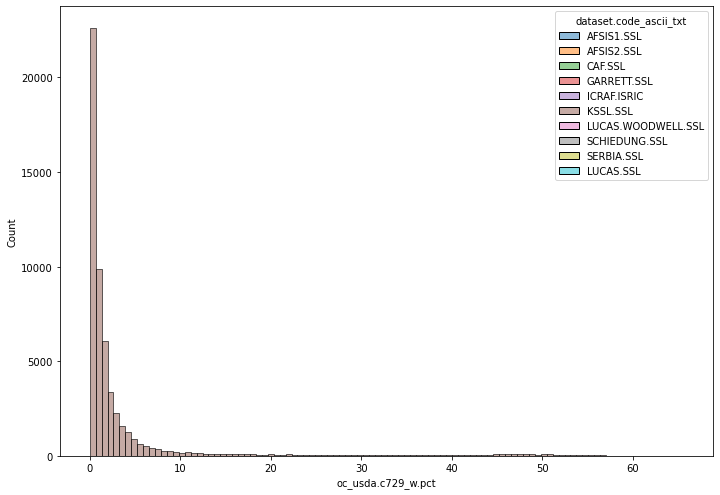

In [38]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='oc_usda.c729_w.pct', hue='dataset.code_ascii_txt', bins=100)

In [38]:
df2 = df['oc_iso.10694_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
6              LUCAS.SSL                  0
7     LUCAS.WOODWELL.SSL                  0
8          SCHIEDUNG.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
5               KSSL.SSL              86603


<AxesSubplot:xlabel='oc_iso.10694_w.pct', ylabel='Count'>

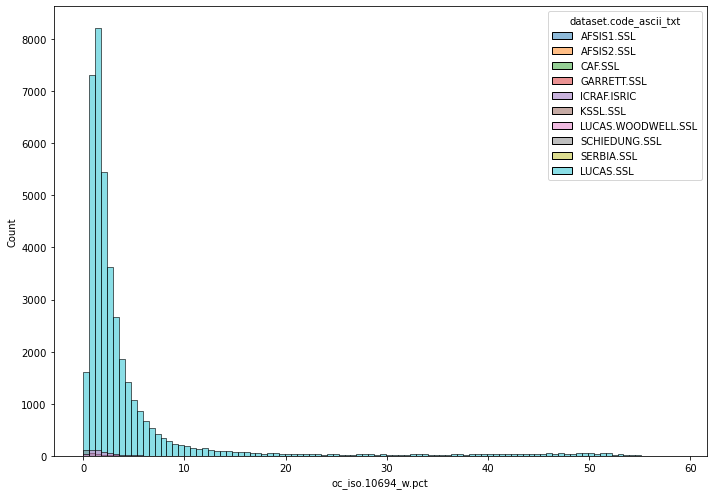

In [37]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='oc_iso.10694_w.pct', hue='dataset.code_ascii_txt', bins=100)

# TOTAL CARBON

In [40]:
df['c.tot_usda.a622_w.pct'].isna().sum()

45422

In [41]:
df2 = df['c.tot_usda.a622_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
1             AFSIS2.SSL                  0
3            GARRETT.SSL                  0
0             AFSIS1.SSL                  2
2                CAF.SSL                 16
9             SERBIA.SSL                 90
5               KSSL.SSL                218
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175


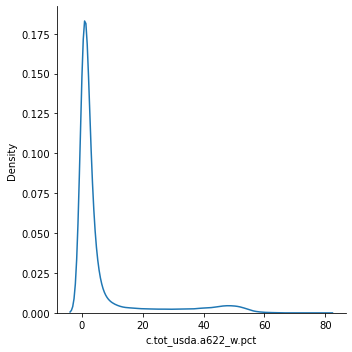

In [42]:
sns.displot(df['c.tot_usda.a622_w.pct'], kind="kde")

<AxesSubplot:xlabel='c.tot_usda.a622_w.pct', ylabel='Count'>

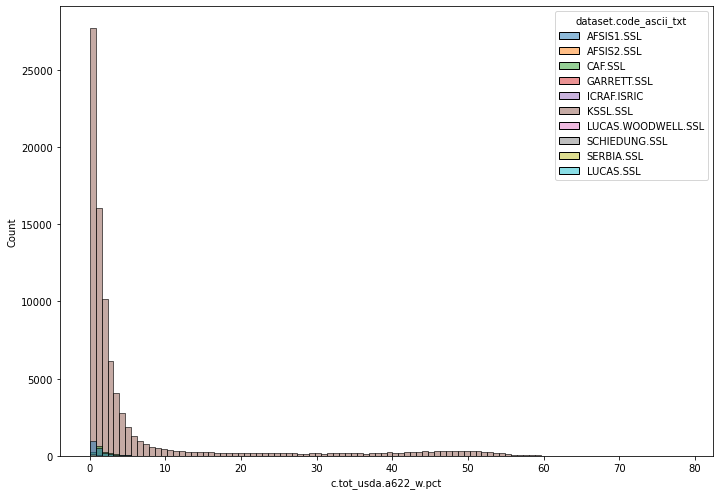

In [36]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='c.tot_usda.a622_w.pct', hue='dataset.code_ascii_txt', bins=100)

# pH

In [46]:
df['ph.h2o_usda.a268_index'].isna().sum()

76241

In [47]:
df2 = df['ph.h2o_usda.a268_index'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
0             AFSIS1.SSL                  0
1             AFSIS2.SSL                  0
3            GARRETT.SSL                  0
9             SERBIA.SSL                 90
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                297
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1095
5               KSSL.SSL              33736
6              LUCAS.SSL              40175


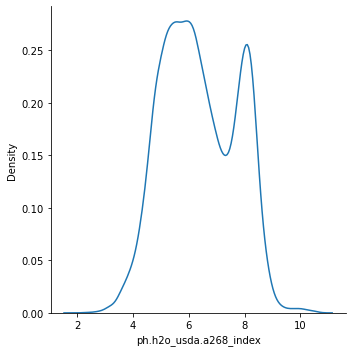

In [48]:
sns.displot(df['ph.h2o_usda.a268_index'], kind="kde")

<AxesSubplot:xlabel='ph.h2o_usda.a268_index', ylabel='Count'>

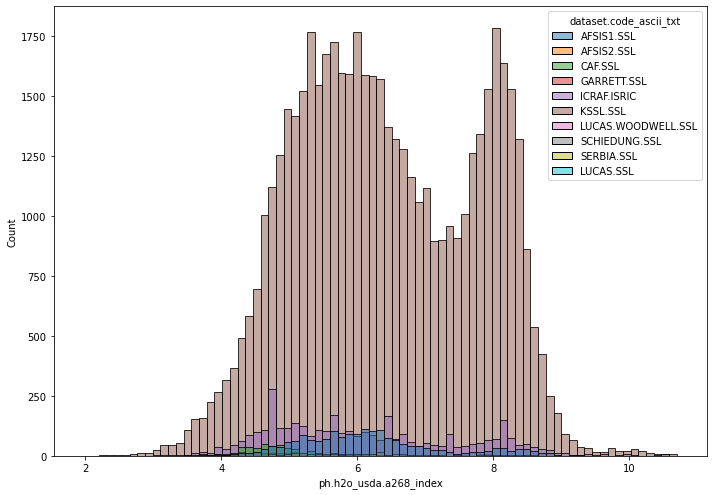

In [32]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='ph.h2o_usda.a268_index', hue='dataset.code_ascii_txt')

In [5]:
df2 = df['ph.h2o_iso.10390_index'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
6              LUCAS.SSL                  0
7     LUCAS.WOODWELL.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
5               KSSL.SSL              86603


<AxesSubplot:xlabel='ph.h2o_iso.10390_index', ylabel='Count'>

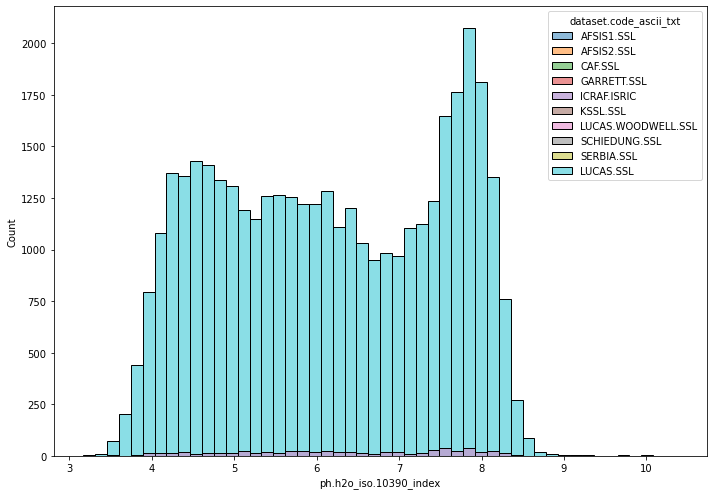

In [33]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='ph.h2o_iso.10390_index', hue='dataset.code_ascii_txt')

# BULK DENSITY

In [6]:
df['bd_usda.a4_g.cm3'].isna().sum()

92652

In [7]:
df2 = df['bd_usda.a4_g.cm3'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
3            GARRETT.SSL                 94
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175
5               KSSL.SSL              43694


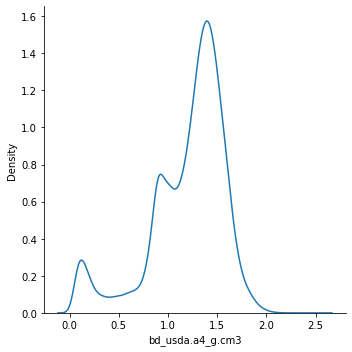

In [8]:
sns.displot(df['bd_usda.a4_g.cm3'], kind="kde")

<AxesSubplot:xlabel='bd_usda.a4_g.cm3', ylabel='Count'>

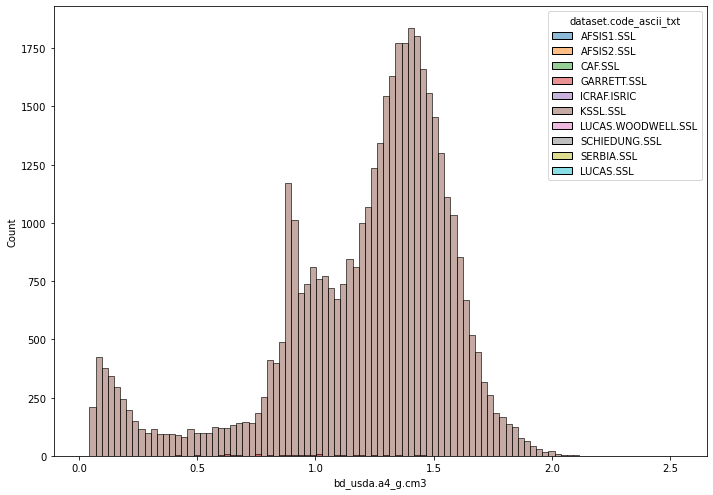

In [35]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='bd_usda.a4_g.cm3', hue='dataset.code_ascii_txt')

# ELECTRICAL CONDUCTIVITY

In [5]:
df['ec_usda.a364_ds.m'].isna().sum()

101861

In [6]:
df2 = df['ec_usda.a364_ds.m'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
0             AFSIS1.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175
5               KSSL.SSL              54717


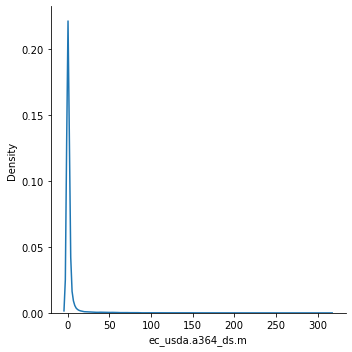

In [7]:
sns.displot(df['ec_usda.a364_ds.m'], kind="kde")

<AxesSubplot:xlabel='ec_usda.a364_ds.m', ylabel='Count'>

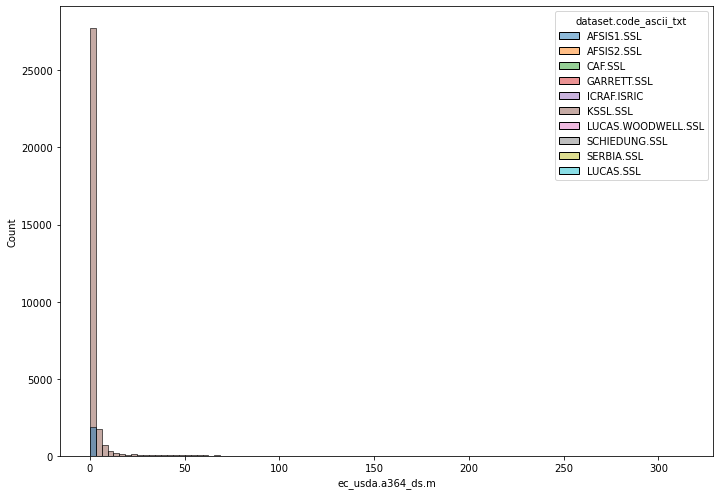

In [43]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='ec_usda.a364_ds.m', hue='dataset.code_ascii_txt', bins=100)

In [9]:
df2 = df['ec_iso.11265_ds.m'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
8          SCHIEDUNG.SSL                  9
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              18393
5               KSSL.SSL              86603


<AxesSubplot:xlabel='ec_iso.11265_ds.m', ylabel='Count'>

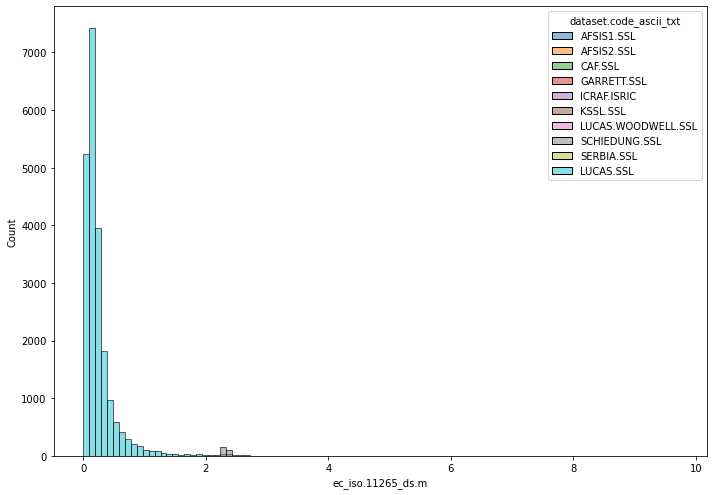

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='ec_iso.11265_ds.m', hue='dataset.code_ascii_txt', bins=100)

# CATION EXCHANGE CAPACITY

In [11]:
df['cec_usda.a723_cmolc.kg'].isna().sum()

78587

In [12]:
df2 = df['cec_usda.a723_cmolc.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
3            GARRETT.SSL                  1
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                419
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
5               KSSL.SSL              33376
6              LUCAS.SSL              40175


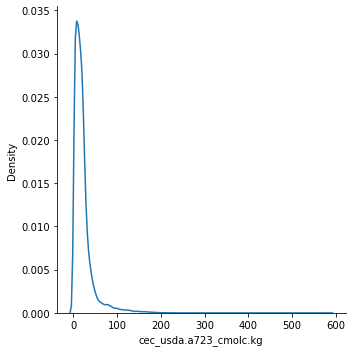

In [13]:
sns.displot(df['cec_usda.a723_cmolc.kg'], kind="kde")

<AxesSubplot:xlabel='cec_usda.a723_cmolc.kg', ylabel='Count'>

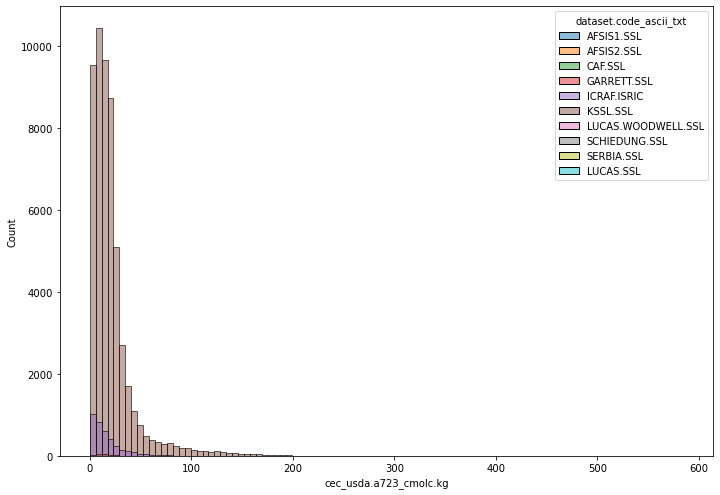

In [45]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='cec_usda.a723_cmolc.kg', hue='dataset.code_ascii_txt', bins=100)

In [15]:
df2 = df['cec_iso.11260_cmolc.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
7     LUCAS.WOODWELL.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              21782
5               KSSL.SSL              86603


<AxesSubplot:xlabel='cec_iso.11260_cmolc.kg', ylabel='Count'>

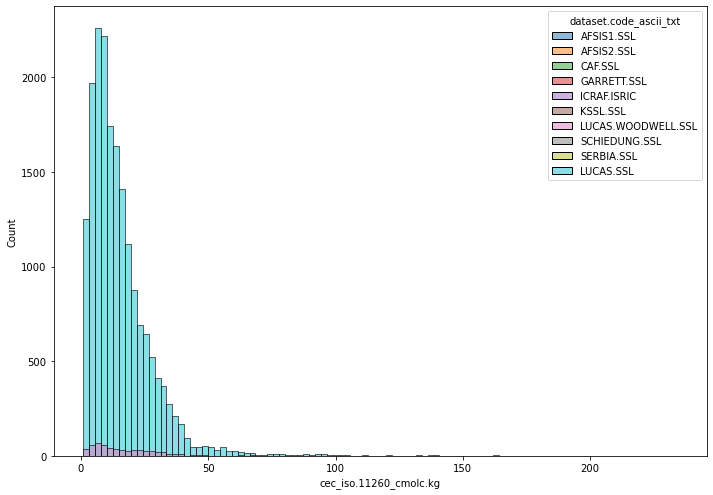

In [46]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='cec_iso.11260_cmolc.kg', hue='dataset.code_ascii_txt', bins=100)

# WATER RETENTION

In [25]:
df['wr.1500kPa_usda.a417_w.pct'].isna().sum()

94306

In [26]:
df2 = df['wr.1500kPa_usda.a417_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
3            GARRETT.SSL                 94
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               3102
6              LUCAS.SSL              40175
5               KSSL.SSL              46319


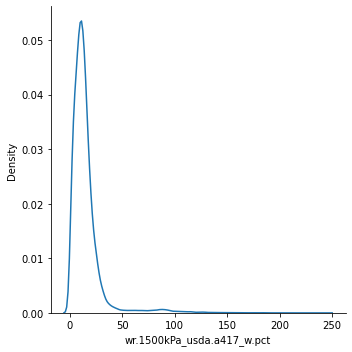

In [27]:
sns.displot(df['wr.1500kPa_usda.a417_w.pct'], kind="kde")

<AxesSubplot:xlabel='wr.1500kPa_usda.a417_w.pct', ylabel='Count'>

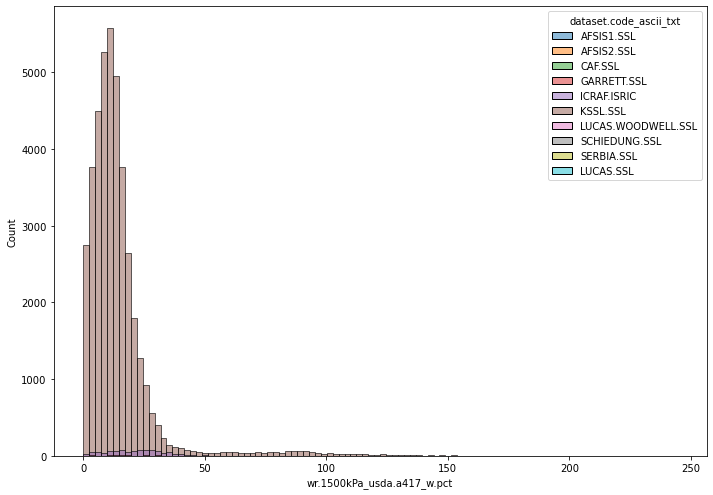

In [48]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='wr.1500kPa_usda.a417_w.pct', hue='dataset.code_ascii_txt', bins=100)

# NITROGEN

In [29]:
df['n.tot_usda.a623_w.pct'].isna().sum()

45407

In [30]:
df2 = df['n.tot_usda.a623_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
1             AFSIS2.SSL                  0
2                CAF.SSL                  0
3            GARRETT.SSL                  0
0             AFSIS1.SSL                  2
9             SERBIA.SSL                 90
5               KSSL.SSL                219
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175


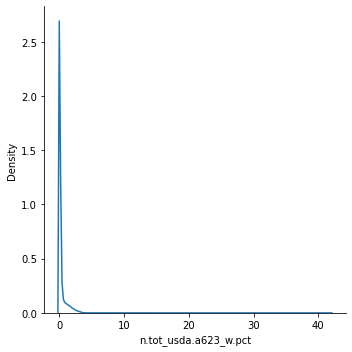

In [31]:
sns.displot(df['n.tot_usda.a623_w.pct'], kind="kde")

<AxesSubplot:xlabel='n.tot_usda.a623_w.pct', ylabel='Count'>

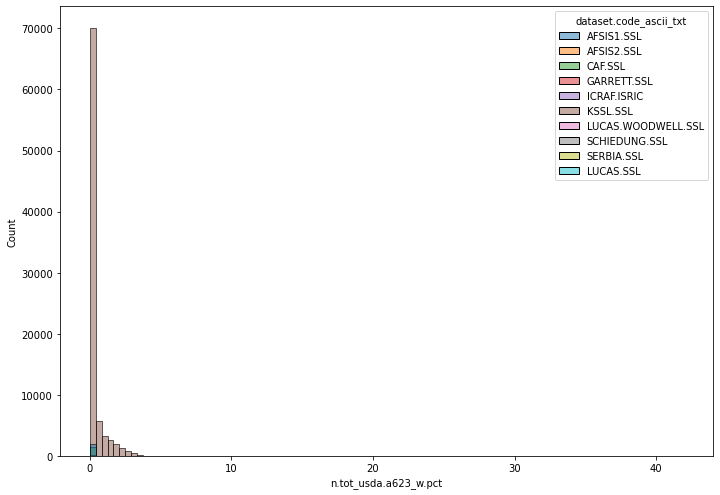

In [49]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='n.tot_usda.a623_w.pct', hue='dataset.code_ascii_txt', bins=100)

In [33]:
df2 = df['n.tot_iso.11261_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
6              LUCAS.SSL                  0
7     LUCAS.WOODWELL.SSL                  0
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
5               KSSL.SSL              86603


<AxesSubplot:xlabel='n.tot_iso.11261_w.pct', ylabel='Count'>

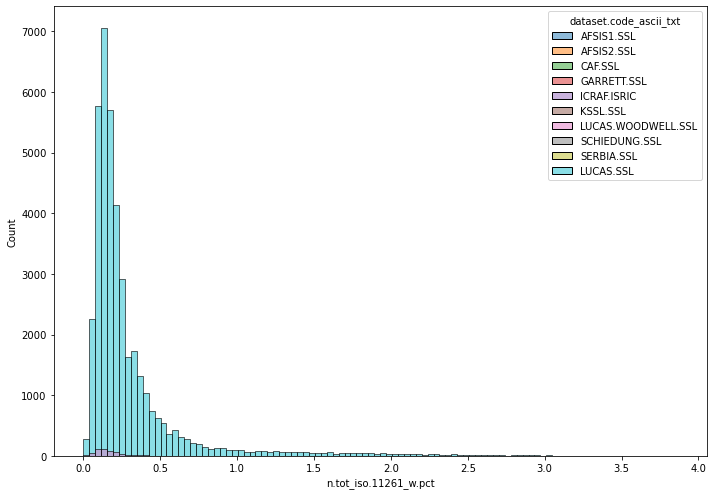

In [51]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='n.tot_iso.11261_w.pct', hue='dataset.code_ascii_txt', bins=100)

# CALCIUM

In [39]:
df['ca.ext_usda.a722_cmolc.kg'].isna().sum()

78564

In [40]:
df2 = df['ca.ext_usda.a722_cmolc.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
3            GARRETT.SSL                  1
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                401
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
5               KSSL.SSL              33371
6              LUCAS.SSL              40175


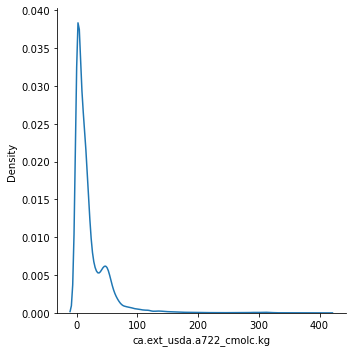

In [41]:
sns.displot(df['ca.ext_usda.a722_cmolc.kg'], kind="kde")

<AxesSubplot:xlabel='ca.ext_usda.a722_cmolc.kg', ylabel='Count'>

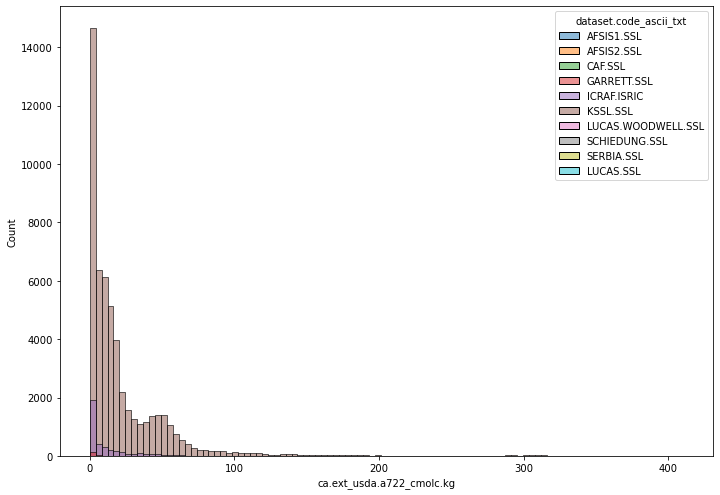

In [52]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='ca.ext_usda.a722_cmolc.kg', hue='dataset.code_ascii_txt', bins=100)

# POTASSIUM

In [11]:
df['k.ext_usda.a725_cmolc.kg'].isna().sum()

37800

In [12]:
df2 = df['k.ext_usda.a725_cmolc.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
6              LUCAS.SSL                  0
7     LUCAS.WOODWELL.SSL                  0
3            GARRETT.SSL                  1
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                399
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
5               KSSL.SSL              33373


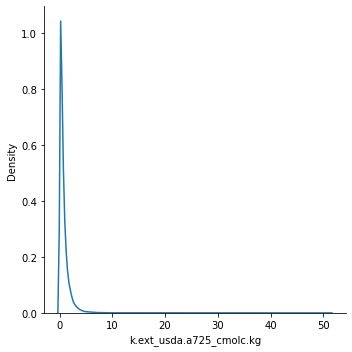

In [13]:
sns.displot(df['k.ext_usda.a725_cmolc.kg'], kind="kde")

<AxesSubplot:xlabel='k.ext_usda.a725_cmolc.kg', ylabel='Count'>

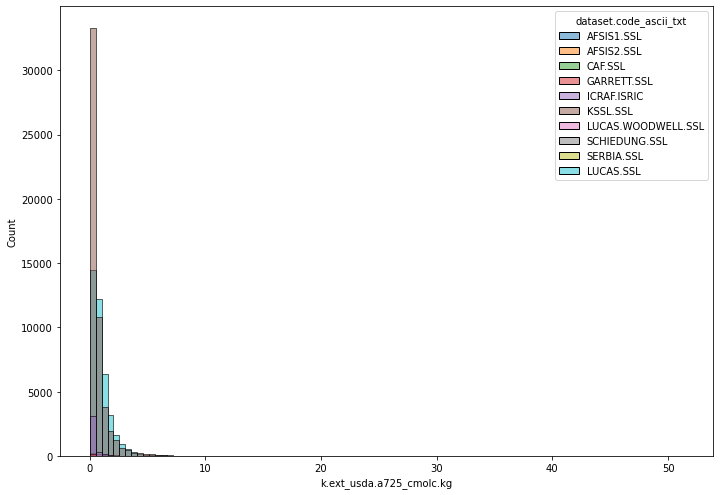

In [53]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='k.ext_usda.a725_cmolc.kg', hue='dataset.code_ascii_txt', bins=100)

# IRON

In [17]:
df['fe.dith_usda.a66_w.pct'].isna().sum()

104513

In [18]:
df2 = df['fe.dith_usda.a66_w.pct'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
3            GARRETT.SSL                184
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175
5               KSSL.SSL              55465


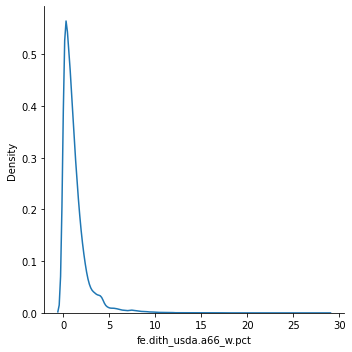

In [19]:
sns.displot(df['fe.dith_usda.a66_w.pct'], kind="kde")

<AxesSubplot:xlabel='fe.dith_usda.a66_w.pct', ylabel='Count'>

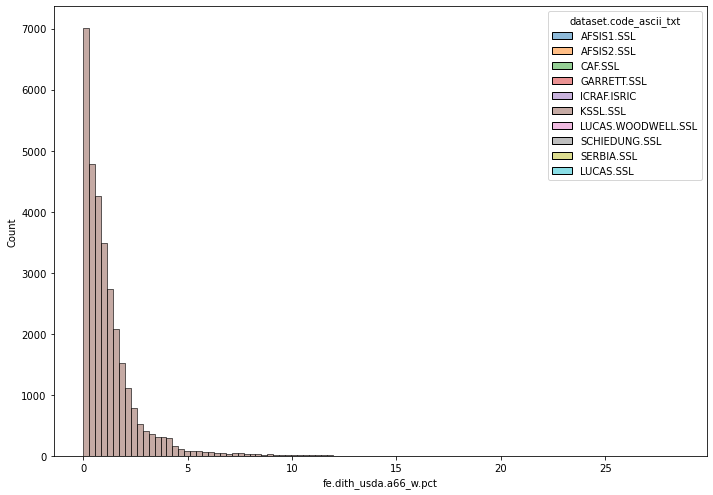

In [54]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='fe.dith_usda.a66_w.pct', hue='dataset.code_ascii_txt', bins=100)

In [21]:
df2 = df['fe.ext_usda.a1064_mg.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
0             AFSIS1.SSL                  0
1             AFSIS2.SSL                  0
3            GARRETT.SSL                  0
9             SERBIA.SSL                135
8          SCHIEDUNG.SSL                259
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
4            ICRAF.ISRIC               4073
6              LUCAS.SSL              40175
5               KSSL.SSL              85069


# MAGNESIUM

In [25]:
df['mg.ext_usda.a724_cmolc.kg'].isna().sum()

78556

In [26]:
df2 = df['mg.ext_usda.a724_cmolc.kg'].isnull().groupby([df['dataset.code_ascii_txt']]).sum().astype(int).reset_index(name='count_null_values')
print(df2.sort_values('count_null_values'))

  dataset.code_ascii_txt  count_null_values
3            GARRETT.SSL                  1
9             SERBIA.SSL                135
1             AFSIS2.SSL                151
8          SCHIEDUNG.SSL                259
4            ICRAF.ISRIC                393
7     LUCAS.WOODWELL.SSL                589
2                CAF.SSL               1578
0             AFSIS1.SSL               1904
5               KSSL.SSL              33371
6              LUCAS.SSL              40175


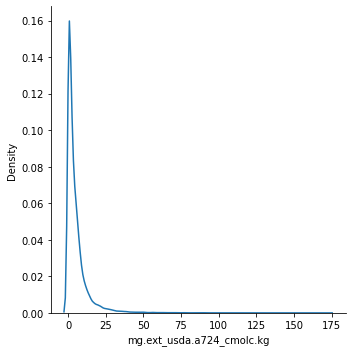

In [27]:
sns.displot(df['mg.ext_usda.a724_cmolc.kg'], kind="kde")

<AxesSubplot:xlabel='mg.ext_usda.a724_cmolc.kg', ylabel='Count'>

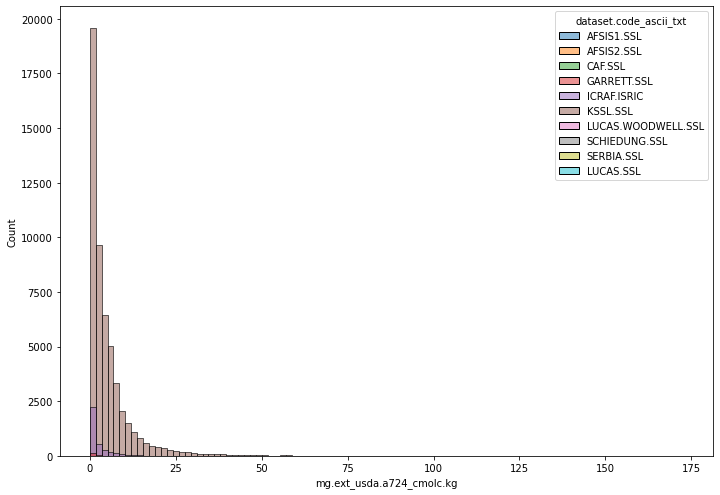

In [55]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(ax=ax, data=df, x='mg.ext_usda.a724_cmolc.kg', hue='dataset.code_ascii_txt', bins= 100)